In [4]:
# Imports
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pickle
from scipy.stats import t
import dask.dataframe as dd
import matplotlib.cm as cm

# Explore the behaviours of malicious users 
1. PCA: Malicious VS Non-Malicious

- PCA loadings help identify key behaviors and personality traits that define variance in user activity data.
- Behaviors include file copying and domain interactions; personality traits are derived from the OCEAN model.
- Comparative analysis of PCA loadings between malicious and non-malicious users reveals distinct patterns:
  - Certain features are more prominent among malicious users, differentiating their behavior from non-malicious users.


In [5]:
# Processed folder
processed_dir = os.path.join( "..", "data", "processed")
final_dataset_path = os.path.join(processed_dir, 'FEData_For_Modelling.parquet')
highimportancepcafeatures_path = os.path.join(processed_dir, 'highimportance_PCAfeatures_graph.pickle')

minority_users_dt_pq = os.path.join(processed_dir, 'minority_users_dt.parquet')
minority_users_smote_dt_pq = os.path.join(processed_dir, 'minority_users_dt_smote.parquet')

minority_users_svm_pq = os.path.join(processed_dir, 'minority_users_svm.parquet')
minority_users_smote_svm_pq = os.path.join(processed_dir, 'minority_users_svm_smote.parquet')

minority_users_nn_pq = os.path.join(processed_dir, 'minority_users_nn.parquet')
minority_users_smote_nn_pq = os.path.join(processed_dir, 'minority_users_nn_smote.parquet')


# Figures folder
figures_dir = os.path.join( "..", "materials", "reports", "figures", "5")
pca_all_path = os.path.join(figures_dir, 'pca_all.png')
pca_non_mal_path = os.path.join(figures_dir, 'pca_non_mal.png')
pca_mal_path = os.path.join(figures_dir, 'pca_mal.png')

FP_Analysis_Boxplots_path = os.path.join(figures_dir, 'FP_Analysis_Boxplots.png')
FP_Analysis_Bar_path = os.path.join(figures_dir, 'FP_Analysis_Bar.png')


In [6]:
# Read the multi-part Parquet dataset
data = pd.read_parquet(final_dataset_path).reset_index(drop = True)
data.head(4000)

,user,O,C,E,A,N,FCwke,FCowh,FCwh,SDwke,SDowh,SDwh,CDwke,CDowh,CDwh,JDwke,JDowh,JDwh,malicious
0,AAB1302,38,41,10,38,28,23,37,142,0,1,10,0,0,0,40,81,246,False
1,AAB1762,32,39,18,18,33,0,194,654,0,9,14,0,0,4,0,243,679,False
2,AAC0904,31,30,36,18,28,0,0,0,0,22,144,0,5,34,0,499,4025,False
3,AAC1033,42,40,40,22,29,0,0,0,0,14,72,0,0,1,0,1,2,False
4,AAC1489,24,13,42,24,38,0,0,0,0,1,175,0,0,2,0,101,5058,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,ZRF1980,43,41,26,16,30,0,9,1272,0,16,298,0,0,11,0,28,494,False
1996,ZUR1449,31,42,12,36,17,0,0,0,0,1,7,0,65,296,0,293,1322,False
1997,ZVW1475,38,35,18,24,37,0,0,0,0,0,1,0,0,0,0,2,7,False
1998,ZWS0755,45,47,42,39,28,0,0,0,0,58,266,0,0,0,0,148,810,False


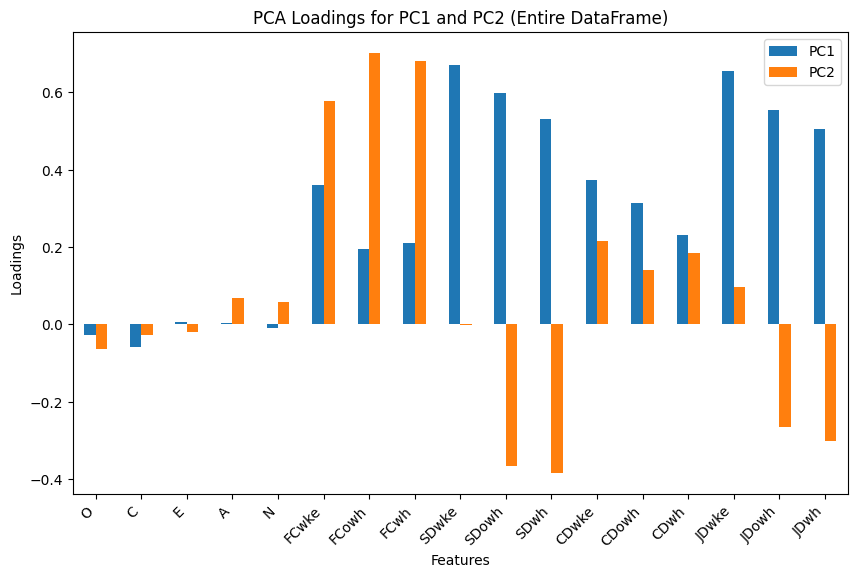

PCA Loadings for PC1 and PC2 (Entire DataFrame):
            PC1       PC2
O     -0.027438 -0.063714
C     -0.058659 -0.027575
E      0.006821 -0.018724
A      0.004482  0.069755
N     -0.008042  0.058521
FCwke  0.360245  0.578797
FCowh  0.196360  0.701848
FCwh   0.209770  0.682578
SDwke  0.672074 -0.000204
SDowh  0.597861 -0.366508
SDwh   0.532451 -0.384308
CDwke  0.372612  0.215637
CDowh  0.314416  0.140781
CDwh   0.232068  0.184068
JDwke  0.655284  0.095992
JDowh  0.553772 -0.265114
JDwh   0.505562 -0.300899


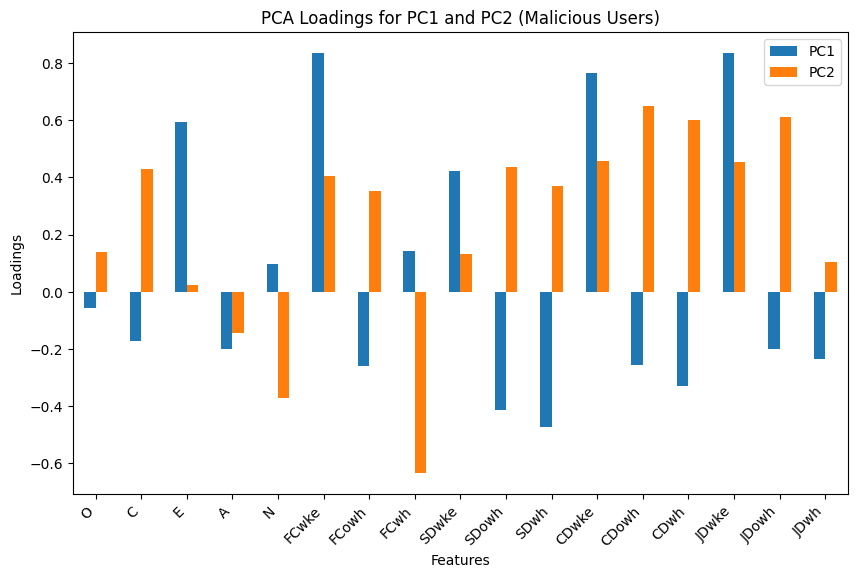

PCA Loadings for PC1 and PC2 (Malicious Users):
            PC1       PC2
O     -0.055193  0.138337
C     -0.172176  0.430476
E      0.592929  0.022325
A     -0.200634 -0.144464
N      0.098203 -0.370682
FCwke  0.834811  0.405964
FCowh -0.257898  0.351602
FCwh   0.144348 -0.633621
SDwke  0.421730  0.133880
SDowh -0.413102  0.438007
SDwh  -0.471289  0.368672
CDwke  0.763659  0.457594
CDowh -0.255594  0.649535
CDwh  -0.330020  0.602178
JDwke  0.834346  0.455694
JDowh -0.201083  0.610376
JDwh  -0.235523  0.105157


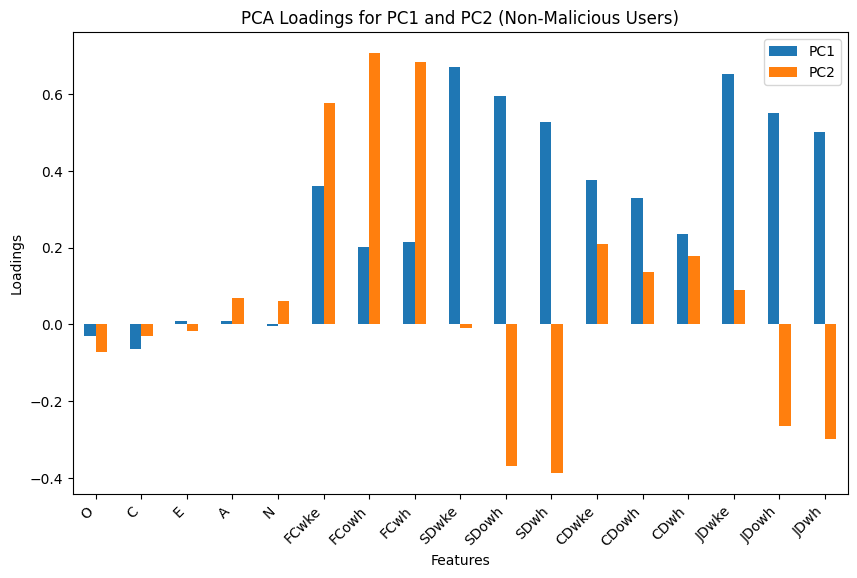

PCA Loadings for PC1 and PC2 (Non-Malicious Users):
            PC1       PC2
O     -0.029445 -0.070902
C     -0.064188 -0.030363
E      0.008781 -0.017228
A      0.007937  0.067690
N     -0.003798  0.061966
FCwke  0.361692  0.576643
FCowh  0.201905  0.707474
FCwh   0.214545  0.685535
SDwke  0.670831 -0.008116
SDowh  0.595759 -0.369703
SDwh   0.528727 -0.387623
CDwke  0.375698  0.209557
CDowh  0.329856  0.136683
CDwh   0.236599  0.178769
JDwke  0.654171  0.088809
JDowh  0.551634 -0.263972
JDwh   0.503005 -0.299445


In [275]:
pca_df = data.copy()
features = ['O', 'C', 'E', 'A', 'N', 'FCwke', 'FCowh', 'FCwh', 'SDwke', 'SDowh', 'SDwh', 'CDwke', 'CDowh', 'CDwh', 'JDwke', 'JDowh', 'JDwh']

X = pca_df[features]
X_std = (X - X.mean()) / X.std()

pca_all = PCA()
pca_all.fit(X_std)
loadings_all_pc1_pc2 = pca_all.components_[:2].T * np.sqrt(pca_all.explained_variance_[:2])

loadings_all_df = pd.DataFrame(loadings_all_pc1_pc2, columns=['PC1', 'PC2'], index=features)

plt.figure(figsize=(10, 6))
loadings_all_df.plot(kind='bar', ax=plt.gca())
plt.title('PCA Loadings for PC1 and PC2 (Entire DataFrame)')
plt.xlabel('Features')
plt.ylabel('Loadings')
plt.xticks(rotation=45, ha='right')
plt.savefig(pca_all_path)
plt.show()

print("PCA Loadings for PC1 and PC2 (Entire DataFrame):")
print(loadings_all_df)

malicious_df = pca_df[pca_df['malicious'] == 1]

X_malicious = malicious_df[features]
X_std_malicious = (X_malicious - X_malicious.mean()) / X_malicious.std()

pca_malicious = PCA()
pca_malicious.fit(X_std_malicious)
loadings_malicious_pc1_pc2 = pca_malicious.components_[:2].T * np.sqrt(pca_malicious.explained_variance_[:2])

loadings_malicious_df = pd.DataFrame(loadings_malicious_pc1_pc2, columns=['PC1', 'PC2'], index=features)

plt.figure(figsize=(10, 6))
loadings_malicious_df.plot(kind='bar', ax=plt.gca())
plt.title('PCA Loadings for PC1 and PC2 (Malicious Users)')
plt.xlabel('Features')
plt.ylabel('Loadings')
plt.xticks(rotation=45, ha='right')
plt.savefig(pca_mal_path)

plt.show()


print("PCA Loadings for PC1 and PC2 (Malicious Users):")
print(loadings_malicious_df)

non_malicious_df = pca_df[pca_df['malicious'] == 0]

X_nonmalicious = non_malicious_df[features]
X_std_nonmalicious = (X_nonmalicious - X_nonmalicious.mean()) / X_nonmalicious.std()

pca_nonmalicious = PCA()
pca_nonmalicious.fit(X_std_nonmalicious)
loadings_nonmalicious_pc1_pc2 = pca_nonmalicious.components_[:2].T * np.sqrt(pca_nonmalicious.explained_variance_[:2])

loadings_nonmalicious_df = pd.DataFrame(loadings_nonmalicious_pc1_pc2, columns=['PC1', 'PC2'], index=features)

plt.figure(figsize=(10, 6))
loadings_nonmalicious_df.plot(kind='bar', ax=plt.gca())
plt.title('PCA Loadings for PC1 and PC2 (Non-Malicious Users)')
plt.xlabel('Features')
plt.ylabel('Loadings')
plt.xticks(rotation=45, ha='right')
plt.savefig(pca_non_mal_path)

plt.show()


print("PCA Loadings for PC1 and PC2 (Non-Malicious Users):")
print(loadings_nonmalicious_df)


## PCA Loadings Analysis

### Entire DataFrame:
- **PC1**: Positive loadings for behaviors outside of standard work hours, especially `FCwke`, `SDwke`, `JDwke`.
- **PC2**: `FCowh`, `FCwh`, and `FCwke` have significant positive loadings; `SDowh` and `SDwh` show negative correlations.

### Malicious Users:
- **PC1**: High positive loadings for weekend activities (`FCwke`, `CDwke`, `JDwke`) and negative for some domain interactions (`SDowh`, `SDwh`).
- **PC2**: `C`, `CDowh`, `CDwh`, `JDowh`, and `FCowh` stand out with positive loadings; `N`, `FCwh`, and `A` are inversely related.

### Non-Malicious Users:
- **PC1 & PC2**: Loading patterns are similar to the entire dataset, suggesting consistent behaviors across all users.

### Comparative Insights:
- **Behavioral Patterns**: Malicious users' loadings highlight weekend and after-hours activities as significant behavior indicators.
- **OCEAN Traits**: Differences in `C` and `N` loadings between malicious and non-malicious users suggest a correlation with malicious behaviors.
- **Principal Component Focus**: For malicious users, PC1 emphasizes weekend activities, while PC2 captures a contrast between conscientiousness and domain activity against neuroticism and work hour activities.

These PCA loadings suggest that certain time-related behaviors and personality traits could be predictive of malicious activities.


In [7]:
df = data.copy()
high_importance_features = ['FCwke', 'CDwke', 'JDwke', 'SDowh', 'SDwh', 'C', 'CDowh', 'CDwh', 'JDowh', 'FCowh', 'N', 'FCwh', 'A']

# Analysis of Post Model Results

In [279]:
dt_data = pd.read_parquet(minority_users_dt_pq)
smote_dt_data = pd.read_parquet(minority_users_smote_dt_pq)

svm_data = pd.read_parquet(minority_users_svm_pq)
smote_svm_data = pd.read_parquet(minority_users_smote_svm_pq)

nn_data = pd.read_parquet(minority_users_nn_pq)
smote_nn_data = pd.read_parquet(minority_users_smote_nn_pq)

fds = data.copy()

In [280]:
# Define models and model names
models = [dt_data, smote_dt_data, svm_data, smote_svm_data, nn_data, smote_nn_data]
model_names = ["dt_data", "smote_dt_data", "svm_data", "smote_svm_data", "nn_data", "smote_nn_data"]
all = [dt_data, smote_dt_data, svm_data, smote_svm_data, nn_data, smote_nn_data, fds]

# Check and rename columns if needed
for model_data in all:
    if 'user' in model_data.columns:
        model_data.rename(columns={'user': 'User'}, inplace=True)

# Reset index for each model
for model_data in models:
    model_data.reset_index(drop=True, inplace=True)

# Filter fds to include only common users
common_users = set.intersection(*[set(model['User']) for model in models])
fds = fds[fds['User'].isin(common_users)].copy()

fds['fn'] = 0
fds['fp'] = 0
fds['tn'] = 0
fds['tp'] = 0

model_dfs = [dt_data, smote_dt_data, svm_data, smote_svm_data, nn_data, smote_nn_data]

# Function to update counts
def update_classification_counts(row, model_df):
    user = row['User']
    actual = row['malicious']
    model_row = model_df[model_df['User'] == user].iloc[0]
    prediction = model_row['Prediction']
    # Update true positives, false positives, etc.
    if actual and prediction:  # True Positive
        fds.loc[fds['User'] == user, 'tp'] += 1
    elif not actual and not prediction:  # True Negative
        fds.loc[fds['User'] == user, 'tn'] += 1
    elif not actual and prediction:  # False Positive
        fds.loc[fds['User'] == user, 'fp'] += 1
    elif actual and not prediction:  # False Negative
        fds.loc[fds['User'] == user, 'fn'] += 1

# Apply updates for each model
for model_df in model_dfs:
    fds.apply(update_classification_counts, axis=1, args=(model_df,))

fds

,User,O,C,E,A,N,FCwke,FCowh,FCwh,SDwke,...,CDowh,CDwh,JDwke,JDowh,JDwh,malicious,fn,fp,tn,tp
23,ACD1174,28,20,38,26,33,0,0,0,0,...,67,555,0,269,1398,False,0,0,6,0
29,ACH1840,20,24,15,45,37,0,0,0,0,...,0,0,0,0,3648,False,0,0,6,0
30,ACJ1797,23,32,19,26,32,0,0,0,6,...,0,0,0,0,0,False,0,0,6,0
32,ACR1045,40,38,10,25,30,0,0,0,0,...,0,0,0,53,262,False,0,0,6,0
44,AEF1032,25,44,48,18,30,0,0,0,0,...,0,0,0,39,239,False,0,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1966,YVJ0986,43,48,15,25,23,0,0,0,0,...,0,6,0,27,316,False,0,0,6,0
1978,ZDH1266,41,44,35,43,29,0,0,0,0,...,0,5,0,9,133,False,0,0,6,0
1981,ZHB1104,34,14,23,18,31,0,0,0,0,...,2,10,0,37,87,False,0,0,6,0
1987,ZJT1601,10,50,38,10,35,0,58,213,0,...,9,38,0,177,542,False,0,0,6,0


# Deep Dive into False Positives

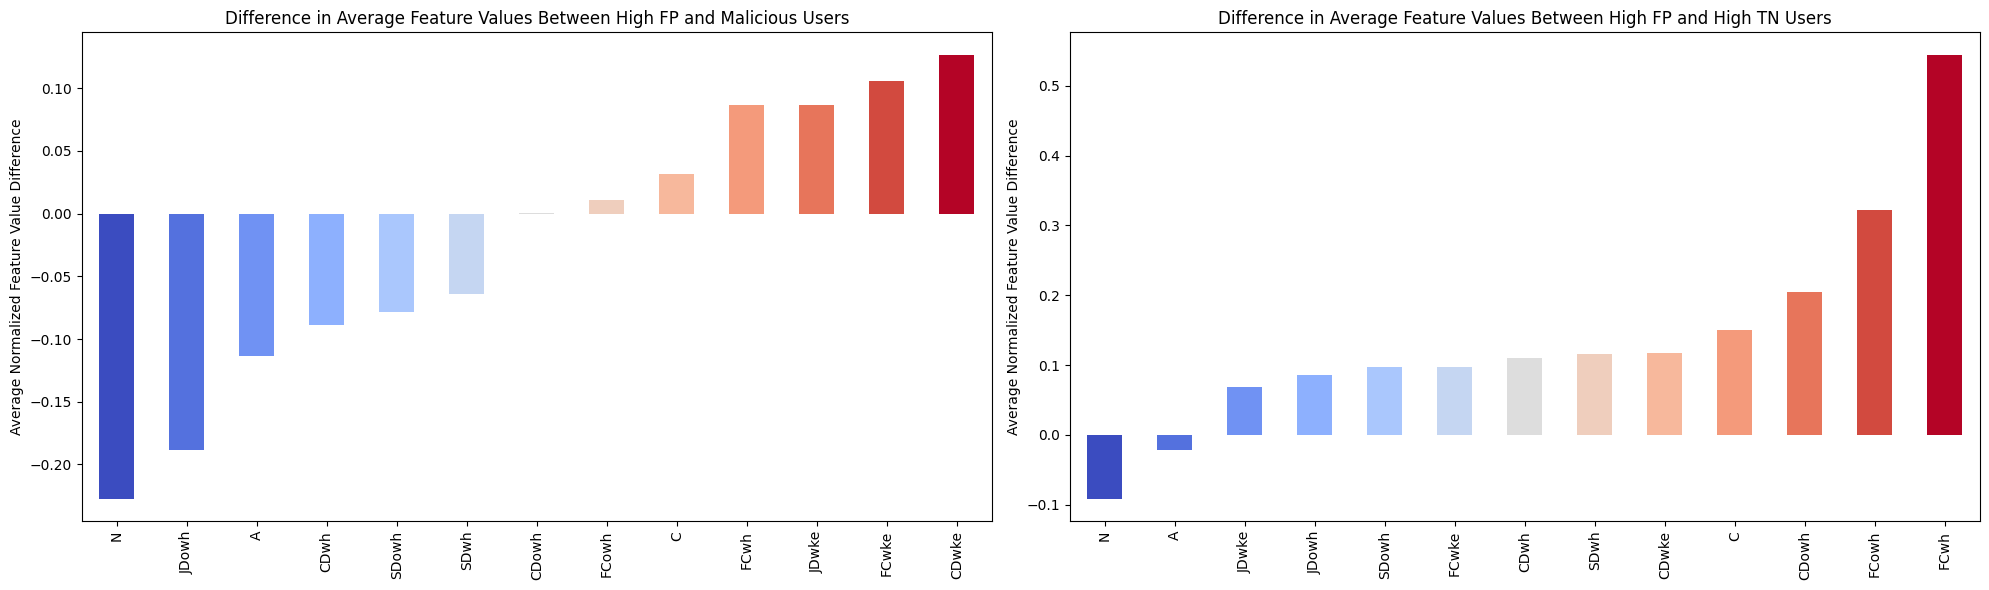

In [281]:
# Filter datasets
high_fp = fds[fds['fp'] >= 1]  # Users wrongly classified as malicious multiple times
high_tn = fds[fds['tn'] >= 5]  # Users correctly classified as non-malicious
mal = fds[fds['malicious'] == 1]  # Truly malicious users

# We want to see the similarities btwn fp and tn, why fp not classified as tn
# also similarities btwn fp and mal, why fp are classified as mal

# Initialize MinMaxScaler
scaler = MinMaxScaler()
# Select features for each dataset
high_fp_features = high_fp[high_importance_features]
high_tn_features = high_tn[high_importance_features]
mal_features = mal[high_importance_features]

high_fp_features = scaler.fit_transform(high_fp_features)
high_fp_features = pd.DataFrame(high_fp_features, columns=high_importance_features)

# Scale features for high_tn dataset
high_tn_features = scaler.fit_transform(high_tn_features)
high_tn_features = pd.DataFrame(high_tn_features, columns=high_importance_features)

# Scale features for mal dataset
mal_features = scaler.fit_transform(mal_features)
mal_features = pd.DataFrame(mal_features, columns=high_importance_features)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

high_fp_means = high_fp_features[high_importance_features].mean()
mal_means = mal_features[high_importance_features].mean()
high_tn_means = high_tn_features[high_importance_features].mean()

feature_diff_fp_vs_tn = (high_fp_means - high_tn_means).sort_values()
feature_diff_fp_vs_mal = (high_fp_means - mal_means).sort_values()

feature_diff_fp_vs_mal.plot(kind='bar', color=color_map(np.linspace(0, 1, len(feature_diff_fp_vs_mal))), ax=axes[0])
axes[0].set_title('Difference in Average Feature Values Between High FP and Malicious Users')
axes[0].set_ylabel('Average Normalized Feature Value Difference')

feature_diff_fp_vs_tn.plot(kind='bar', color=color_map(np.linspace(0, 1, len(feature_diff_fp_vs_tn))), ax=axes[1])
axes[1].set_title('Difference in Average Feature Values Between High FP and High TN Users')
axes[1].set_ylabel('Average Normalized Feature Value Difference')

plt.tight_layout()
plt.savefig(FP_Analysis_Bar_path)
plt.show()

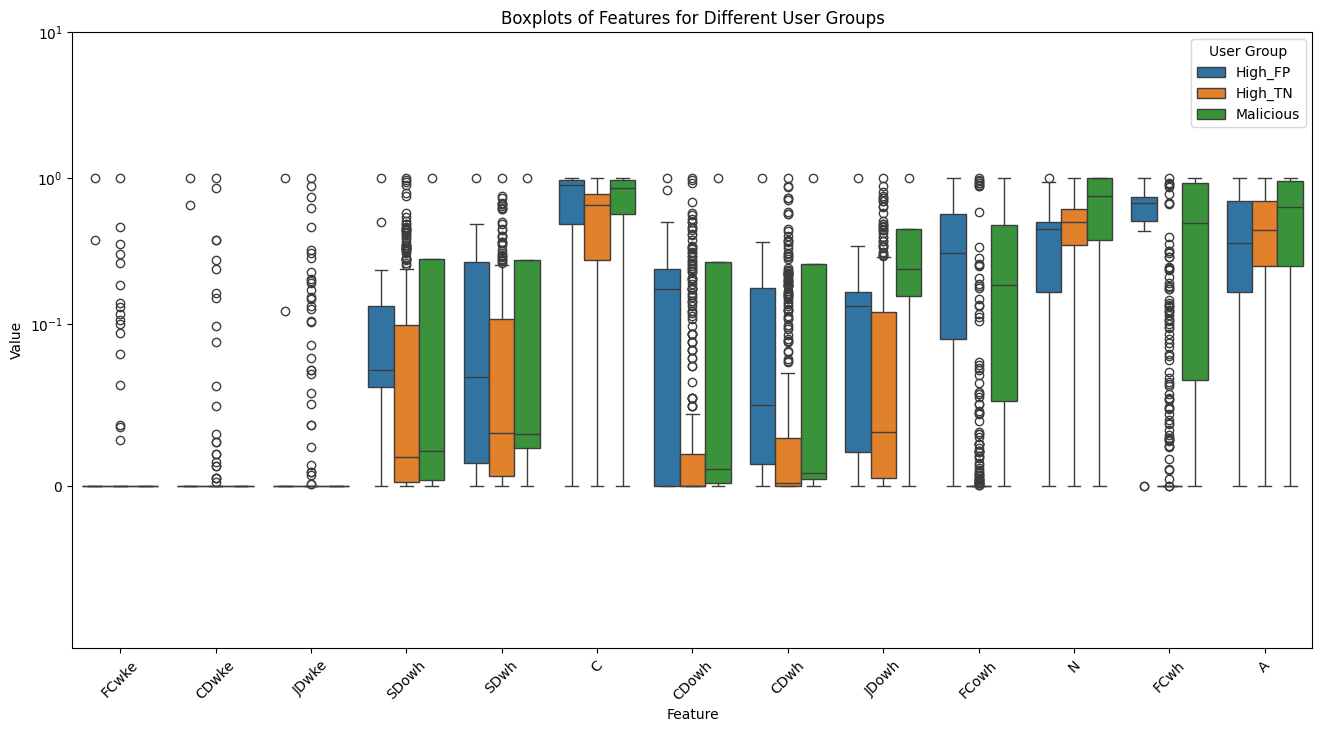

In [282]:
ft = ['SDwh', 'JDowh', 'CDwh', 'FCowh', 'FCwh']
ft = high_importance_features

high_fp_features = high_fp_features[ft]
high_tn_features = high_tn_features[ft]
mal_features = mal_features[ft]

combined_data = pd.concat([high_fp_features, high_tn_features, mal_features],
                          keys=['High_FP', 'High_TN', 'Malicious'])

# Melt the dataframe for easy plotting
melted_data = combined_data.reset_index().melt(id_vars=['level_0'], var_name='Feature', value_name='Value')
melted_data = melted_data[melted_data['Feature'] != 'level_1']

# Plot boxplots
plt.figure(figsize=(16, 8))
sns.boxplot(x='Feature', y='Value', hue='level_0', data= melted_data)
plt.title('Boxplots of Features for Different User Groups')
plt.xticks(rotation=45)
plt.yscale("symlog", linthresh=0.1)
plt.ylim(bottom = -1e-1,top=1e1)
plt.xlabel('Feature')
plt.ylabel('Value')
plt.legend(title='User Group')
plt.savefig(FP_Analysis_Boxplots_path)
plt.show()

## Insights
## 1. High False Positives (FP) vs. Malicious Users
Identifying why high false positives (FP) are misclassified as malicious by comparing activity patterns.


### Similar Features (FP ≈ Mal)
- `CDowh`, `FCowh`,`SDowh`: Similar frequency in cloud and suspicious domain visits outside working hours.
- Ineffective Features: Access to certain domains and file copy activity OUTSIDE WORKING HOURS on weekdays is common to both FP and malicious users, which may indicate the need for a re-evaluation of classification criteria.


### Key Differentiators
- **More Activity by FP**: `FCwke`, `CDwke`, `JDwke` indicate higher weekend activities by FP users compared to malicious users.
- **Higher for Malicious Users**: `A`, `N`, `JDowh`: indicate malicious users have a significantly higher A and N score, while malicious users access Job Domains outside workhours on weekdays specifically more than FP users. 


### Implications
- Non-malicious weekend activities are often misclassified as malicious.
- The analysis suggests that the model may require adjustments to reduce false positives,
considering the legitimate use cases of non-malicious users, especially during weekends.


## 2. False Positives (FP) vs. True Negatives (TN)
Explore similarities and differences to find out why high false positives (FP) are not classified as TN.


### Similar Features (FP ≈ TN)
- `A`, `JDwe`: Similar values suggest these are reliable for identifying non-malicious users, should be weighted more in the model.


### Features that are different but should be weighted less
- **Low Difference (FP << TN)**:
 - `N`: Lower values for some misclassified non-malicious users, suggesting that a low `N` may not indicate malicious intent.
- **High Difference (FP >> TN)**:
 - `FCwh`, `FCowh`: Users with high file copy activity during work hours and outside work hours on weekdays are misclassified as malicious 
 - `CDowh`: Elevated cloud domain access outside work hours on weekdays.

### Insights
- Non-malicious misclassfied users have higher activity for features `FCwh`, `FCowh` and `CDowh`, these features might be unreliable and should be reviewed for its effectiveness in the model.